In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("E://Datasets/MNIST DATA/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

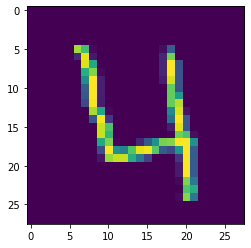

In [5]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[3,1:].values.reshape(28,28))

# Without any PCA.

In [6]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(33600, 784)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier()

In [11]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

10.442799091339111


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

# NOW WITH PCA.

In [14]:
## STEP 1- MEAN CENTRIC.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
## PCA
## n_components=None means , it will give the same amount of features, we change it to 100 or 200. 
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [16]:
x_train.shape

(33600, 784)

In [17]:
## PCA
## n_components=None means , it will give the same amount of features, we change it to 100 or 200. 
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [18]:
## Now the Features are changed to 100.
x_train_trf.shape

(33600, 100)

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(x_test_trf)

In [21]:
accuracy_score(y_test,y_pred)

0.9545238095238096

In [22]:
 for i in range(1,785):
        pca = PCA(n_components=i)
        x_train_trf = pca.fit_transform(x_train)
        x_test_trf = pca.transform(x_test)
        
        knn = KNeighborsClassifier()
        knn.fit(x_train_trf,y_train)
        
        y_pred = knn.predict(x_test_trf)
        print(f"i = {i} , accuracy_score = {accuracy_score(y_test,y_pred)}")

i = 1 , accuracy_score = 0.25916666666666666
i = 2 , accuracy_score = 0.32416666666666666
i = 3 , accuracy_score = 0.5105952380952381
i = 4 , accuracy_score = 0.6663095238095238
i = 5 , accuracy_score = 0.7376190476190476
i = 6 , accuracy_score = 0.8225
i = 7 , accuracy_score = 0.843452380952381
i = 8 , accuracy_score = 0.8721428571428571
i = 9 , accuracy_score = 0.8867857142857143
i = 10 , accuracy_score = 0.905952380952381
i = 11 , accuracy_score = 0.9114285714285715
i = 12 , accuracy_score = 0.9182142857142858
i = 13 , accuracy_score = 0.9286904761904762
i = 14 , accuracy_score = 0.9339285714285714
i = 15 , accuracy_score = 0.9385714285714286
i = 16 , accuracy_score = 0.9385714285714286
i = 17 , accuracy_score = 0.9408333333333333
i = 18 , accuracy_score = 0.9404761904761905
i = 19 , accuracy_score = 0.9419047619047619
i = 20 , accuracy_score = 0.9439285714285715
i = 21 , accuracy_score = 0.9436904761904762
i = 22 , accuracy_score = 0.9434523809523809
i = 23 , accuracy_score = 0.944

KeyboardInterrupt: 

In [24]:
print(f"The shape of x_train_trf is {x_train_trf.shape}")
print(f"The shape of x_test_trf is {x_test_trf.shape}")

The shape of x_train_trf is (33600, 44)
The shape of x_test_trf is (8400, 44)


In [27]:
## Attributes of PCA

## Eigen Values
pca.explained_variance_ ## These are eigen values. since i is 45 in the loop, there are 45 eigen values

array([40.67111198, 29.17023401, 26.74459621, 20.85344792, 18.14891878,
       15.8529825 , 13.87108101, 12.48058967, 11.02794235, 10.09582528,
        9.63317818,  8.62785897,  8.06303054,  7.89511706,  7.44167659,
        7.17032782,  6.73265574,  6.62743049,  6.41497826,  6.25805448,
        5.90491335,  5.76517907,  5.52074688,  5.3199419 ,  5.1829176 ,
        4.93401731,  4.90587187,  4.71726552,  4.49623465,  4.42828886,
        4.32396895,  4.23325604,  4.09392172,  4.06460787,  4.02057674,
        3.83220631,  3.81095896,  3.69578306,  3.58943879,  3.42666584,
        3.41368199,  3.35736378,  3.26093104,  3.19974444,  3.18143995])

In [30]:
## Eigen vectors.
pca.components_## There are 45 vectors in 784 space.

array([[ 1.00000000e+00, -6.52256027e-16, -1.00093545e-15, ...,
         3.64922141e-33,  4.39494628e-34, -9.39120171e-34],
       [ 6.81746326e-16,  1.00000000e+00, -1.19348975e-14, ...,
        -7.82176217e-33,  1.77402982e-33,  1.42058451e-33],
       [ 1.09634524e-15,  1.18793864e-14,  1.00000000e+00, ...,
         8.13713189e-33, -6.78684048e-34, -1.43843628e-33],
       ...,
       [-5.83605908e-12,  1.23826680e-11, -1.32726278e-12, ...,
         6.91551372e-32, -4.83985661e-32, -1.17230858e-32],
       [ 6.56194358e-12,  1.13097192e-10, -1.08473536e-10, ...,
         2.05604270e-32, -1.38941067e-32, -9.70269937e-33],
       [-7.44916613e-12, -5.73667849e-11,  1.31231936e-10, ...,
         2.30262672e-32,  2.05062679e-33, -8.59170818e-34]])

# FINDING THE OPTINUM NUMBER OF PRINCIPLE COMPONENTS.

Every single eigen values tells us the variance given by the corresponding eigen vector(PC1,PC2..)<br>
But we need to convert them into percentage value.

**We have to take that many components whose overall percentage is 90%**

suppose, x is denoted as eigen values.

we have x1,x2,x3,x4,x5,x6,x7,x8,x9. <br>
And when we do this calculation<br>
{(x1+x2+x3+x4+x5+x6)/summation(x1,x2,x3,x4,x5,x6,x7,x8,x9)} x 100 = 90%. <br>
Then we will take only 6 components.

In [34]:
pca = PCA(n_components=None)
x_train_trf2 = pca.fit_transform(x_train)
x_test_trf2 = pca.fit_transform(x_test)

In [35]:
pca.explained_variance_.shape

(784,)

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44085413, 0.52967954, 0.55599861, 0.5746144 , 0.59208444,
       0.60829425, 0.62144214, 0.63296547, 0.64301444, 0.65186491,
       0.66010921, 0.66752365, 0.67458846, 0.6812157 , 0.68779694,
       0.69412658, 0.70006253, 0.70589273, 0.71152469, 0.71706969,
       0.7223117 , 0.7273664 , 0.73227288, 0.7371033 , 0.74178379,
       0.74629945, 0.75071207, 0.75480805, 0.75884578, 0.76276093,
       0.76655628, 0.77023803, 0.773757  , 0.77714048, 0.78044299,
       0.7836703 , 0.78680644, 0.78983423, 0.79277379, 0.79561433,
       0.79843656, 0.80124174, 0.80393726, 0.80659643, 0.80924156,
       0.81178074, 0.81427147, 0.81673992, 0.81918024, 0.82154849,
       0.82387757, 0.82615598, 0.82836536, 0.83053629, 0.83265536,
       0.83474808, 0.83683309, 0.83886351, 0.84081051, 0.84275011,
       0.84466232, 0.84653634, 0.84838243, 0.85016293, 0.85193234,
       0.85369586, 0.85541788, 0.85708229, 0.85872741, 0.86035976,
       0.86193664, 0.86350778, 0.86506727, 0.86657887, 0.86807

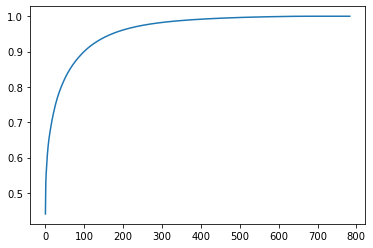

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Here we can see that, 90percent variance is explained by using 100 components.